In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import os
import json
from sklearn.decomposition import PCA
from itertools import permutations
np.random.seed(42)

%matplotlib inline  
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
# Set data input folder
# Download files described in README.md to this folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [3]:
# Load p_values from the hit calling process
df_p_value = pd.read_csv('outputs/HeLa_SABER_significant_features_mann_whitney_p_values.csv.gz')
df_p_value = df_p_value.set_index('Gene')

# Load expression data 
with open("outputs/HeLa_SABER_CCLE_expression_summary.json") as f:
    express = json.load(f)
    zero_tpm_list = express['zero_tpm']
    expressed_gene_list = express['expressed_genes']



In [4]:
# Extract the features from the guide level profiles
feature_dict = {}
features = list(df_p_value.columns)[2:]
dna_list = [feature for feature in df_p_value.columns if 'dna'  in feature.lower()]
phalloidin_list = [feature for feature in df_p_value.columns if 'phalloidin'  in feature.lower()]
catalase_list = [feature for feature in df_p_value.columns if 'catalase'  in feature.lower()]
btubulin_list = [feature for feature in df_p_value.columns if 'btubulin'  in feature.lower()]
calnexin_list = [feature for feature in df_p_value.columns if 'calnexin'  in feature.lower()]
nfkb_list = [feature for feature in df_p_value.columns if 'nfkb'  in feature.lower()]
coxiv_list = [feature for feature in df_p_value.columns if 'coxiv'  in feature.lower()]
mito_list = [feature for feature in df_p_value.columns if 'mito' in feature.lower()]
coxiv_list = list(set(coxiv_list+mito_list))
lamp1_list = [feature for feature in df_p_value.columns if 'lamp1'  in feature.lower()]
prsp6_list = [feature for feature in df_p_value.columns if 'prsp6'  in feature.lower()]
syto9_list = [feature for feature in df_p_value.columns if 'syto9'  in feature.lower()]
tdp43_list = [feature for feature in df_p_value.columns if 'tdp43'  in feature.lower()]
g3bp1_list = [feature for feature in df_p_value.columns if 'g3bp1'  in feature.lower()]
gm130_list = [feature for feature in df_p_value.columns if 'gm130'  in feature.lower()]

feature_dict = {'DNA':dna_list,'Phalloidin':phalloidin_list,'Catalase':catalase_list,'btubulin':btubulin_list,'Calnexin':calnexin_list,
                'NfKb':nfkb_list,'COXIV':coxiv_list,'LAMP1':lamp1_list,'PRSP6':prsp6_list,
                'Syto9':syto9_list,'TDP43':tdp43_list,'G3BP1':g3bp1_list,'GM130':gm130_list,'Sum':features}
print(f'Number of features per compartment: ','\n',
            'dna features: ',len(dna_list),'\n',
            'Phalloidin features: ',len(phalloidin_list),'\n',
            'catalase features: ',len(catalase_list),'\n',
            'btubulin features: ',len(btubulin_list),'\n',
            'calnexin features: ',len(calnexin_list),'\n',
            'nfkb features: ',len(nfkb_list),'\n',
            'coxiv features: ',len(coxiv_list),'\n',
            'lamp1 features: ',len(lamp1_list),'\n',
            'prsp6 features: ',len(prsp6_list),'\n',
            'syto9 features: ',len(syto9_list),'\n',
            'tdp43 features: ',len(tdp43_list),'\n',
            'g3bp1 features: ',len(g3bp1_list),'\n',
            'gm130 features: ',len(gm130_list),'\n',
)

Number of features per compartment:  
 dna features:  278 
 Phalloidin features:  209 
 catalase features:  171 
 btubulin features:  200 
 calnexin features:  208 
 nfkb features:  182 
 coxiv features:  288 
 lamp1 features:  165 
 prsp6 features:  227 
 syto9 features:  295 
 tdp43 features:  248 
 g3bp1 features:  173 
 gm130 features:  200 



In [5]:
# Calculate false discovery rate (FDR)
def FDR_1(control_sig_feature):
    total = len(control_sig_feature)
    FDR_1 = int(total/100)
    dna_1, phal_1, cat_1, btub_1, caln_1, p65_1, cox_1, lamp_1, prsp_1, syto_1, tdp_1, g3bp_1, gm130_1, sum_1 = 0,0,0,0,0,0,0,0,0,0,0,0,0,0
    channels = ['DNA','Phalloidin','Catalase','btubulin','Calnexin','NfKb','COXIV','LAMP1','PRSP6','Syto9',
            'TDP43','G3BP1','GM130']
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('DNA > @c'))
        dna_1 = c + 1
        c-=1    
    
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('Phalloidin > @c'))
        phal_1 = c + 1
        c-=1     
    
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('Catalase > @c'))
        cat_1 = c + 1
        c-=1    
    
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('btubulin > @c'))
        btub_1 = c + 1
        c-=1    
    
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('Calnexin > @c'))
        caln_1 = c + 1
        c-=1    
        
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('NfKb > @c'))
        p65_1 = c + 1
        c-=1

    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('COXIV > @c'))
        cox_1 = c + 1
        c-=1    
        
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('LAMP1 > @c'))
        lamp_1 = c + 1
        c-=1    
    
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('PRSP6 > @c'))
        prsp_1 = c + 1
        c-=1    
    
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('Syto9 > @c'))
        syto_1 = c + 1
        c-=1    
        
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('TDP43 > @c'))
        tdp_1 = c + 1
        c-=1

    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('G3BP1 > @c'))
        g3bp_1 = c + 1
        c-=1    
    
    c = 400
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('GM130 > @c'))
        gm130_1 = c + 1
        c-=1    
        
    c = 5000
    feat_1 = 0
    while feat_1 <= FDR_1:
        feat_1 = len(control_sig_feature.query('Sum > @c'))
        sum_1 = c + 1
        c-=1
    
    return dna_1, phal_1, cat_1, btub_1, caln_1, p65_1, cox_1, lamp_1, prsp_1, syto_1, tdp_1, g3bp_1, gm130_1, sum_1




In [6]:
# Quantification of number of significant features per compartment at a certain p-value
threshold_dict = {}
p_value = 0.001
gene_list = list(df_p_value.index)

df_sig_feature = pd.DataFrame(index=gene_list)
for gene in gene_list:
    for channel in feature_dict.keys():
        count = 0
        for feat in feature_dict[channel]:
            if df_p_value.loc[gene,feat]<p_value:
                count += 1
        df_sig_feature.loc[gene,channel] = count
    
df_sig_feature = df_sig_feature.drop(index = 'sig_gene_count')
# Perturbations divided into 2 groups of controls with 0 TPM and others
df_sig_feature_zero_tpm = df_sig_feature.loc[zero_tpm_list]
df_sig_feature_expressed = df_sig_feature.loc[expressed_gene_list]

# Compute and print the threshold for FDR calculations at 5% from the 0 TPM gene perturbations
dna_1, phal_1, cat_1, btub_1, caln_1, p65_1, cox_1, lamp_1, prsp_1, syto_1, tdp_1, g3bp_1, gm130_1, sum_1 = FDR_1(df_sig_feature_zero_tpm)

threshold_dict = {'DNA':dna_1,'Phalloidin':phal_1,'Catalase':cat_1,'btubulin':btub_1,
                  'Calnexin':caln_1,'NfKb':p65_1,'COXIV':cox_1,'LAMP1':lamp_1,'PRSP6':prsp_1,'Syto9':syto_1,
                  'TDP43':tdp_1,'G3BP1':g3bp_1,'GM130':gm130_1,'Sum':sum_1}
print(f'For HeLa \n'
    'DNA genes', dna_1, '\n', 
    'Phalloidin genes', phal_1, '\n',
    'Catalase genes', cat_1, '\n', 
    'btubulin genes', btub_1, '\n', 
    'Calnexin genes', caln_1, '\n',
    'NfKb genes', p65_1, '\n',
    'COXIV genes', cox_1, '\n',
    'LAMP1 genes', lamp_1, '\n',
    'PRSP6 genes', prsp_1, '\n',
    'Syto9 genes', syto_1, '\n',
    'TDP43 genes', tdp_1, '\n',
    'G3BP1 genes', g3bp_1, '\n',
    'GM130 genes', gm130_1, '\n',
    'Whole Profile genes', sum_1)
# Save the number of significant features per channel for whole cell hits and compartment hits

whole_cell_hits = df_sig_feature_expressed.query('Sum > @sum_1')                                                                                                                                                                                                   
comp_spec_hits = df_sig_feature_expressed.query('Sum <= @sum_1').query('DNA > @dna_1 | Phalloidin > @phal_1 | Catalase > @cat_1 | btubulin > @btub_1 | Calnexin > @caln_1 | NfKb > @p65_1 | COXIV > @cox_1 | LAMP1 > @lamp_1 | PRSP6 > @prsp_1 | Syto9 > @syto_1 | TDP43 > @tdp_1 | G3BP1 > @g3bp_1 | GM130 > @gm130_1')
whole_cell_hits.reset_index().rename(columns={'index':'Gene'}).to_csv(os.path.join(output_folder,f'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_whole_cell_hits.csv'),index=False)
comp_spec_hits.reset_index().rename(columns={'index':'Gene'}).to_csv(os.path.join(output_folder,f'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_compartment_specific_hits.csv'),index=False)


For HeLa 
DNA genes 10 
 Phalloidin genes 18 
 Catalase genes 6 
 btubulin genes 7 
 Calnexin genes 12 
 NfKb genes 11 
 COXIV genes 24 
 LAMP1 genes 17 
 PRSP6 genes 16 
 Syto9 genes 18 
 TDP43 genes 13 
 G3BP1 genes 8 
 GM130 genes 11 
 Whole Profile genes 83


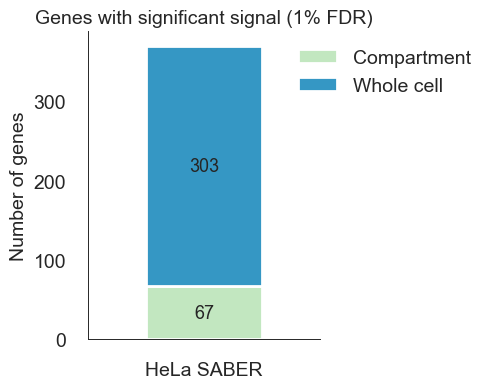

In [7]:
# Plot hits summary for Fig 3A
mpl.rc('axes', linewidth=0.7)
mpl.rc('xtick', labelsize=14)
mpl.rc('xtick', labelsize=14)

fig, ax = plt.subplots(figsize=(3,4))
colors = sns.color_palette('GnBu')[:8]
hits_plot = pd.DataFrame({'Compartment': [len(comp_spec_hits)],
                         'Whole cell': [len(whole_cell_hits)]},
                        index=['HeLa SABER'])

hits_plot.plot(kind='bar', 
               stacked=True,
               color=[colors[1], colors[4]],
               legend = 'reverse',
               rot = 0,
               fontsize= 14,
               width = 0.5,
               ax=ax)

ax.set_title('Genes with significant signal (1% FDR)',size=14) #Genes with significant signal above noise
ax.set_ylabel('Number of genes',size=14)

ax.bar_label(ax.containers[0],label_type='center',size=13)
ax.bar_label(ax.containers[1],label_type='center',size=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc="upper left", bbox_to_anchor=(0.83,1),frameon=False, ncol=1, fontsize =14)
fig.savefig(os.path.join(output_folder,'figure_panels','_HeLa_SABER_whole_cell_compartment_specific_hits.png'),dpi = 300,bbox_inches='tight')


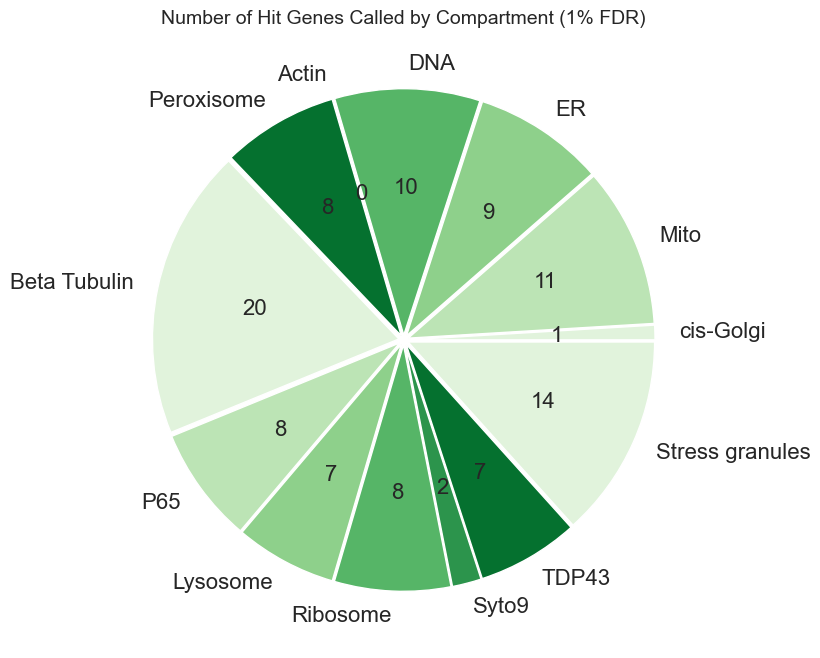

In [8]:
# Plot hits summary for Fig 3B
def absolute_value2(val):
    a  = data[np.abs(data - val/100.*sum(data)).argmin() ]
    return a

labels = ['cis-Golgi','Mito','ER','DNA','Actin','Peroxisome','Beta Tubulin','P65','Lysosome','Ribosome','Syto9','TDP43','Stress granules']

data = [len(comp_spec_hits.query('GM130 > @gm130_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('COXIV > @cox_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('Calnexin > @caln_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('DNA > @dna_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('Phalloidin > @phal_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('Catalase > @cat_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('btubulin > @btub_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('NfKb > @p65_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('LAMP1 > @lamp_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('PRSP6 > @prsp_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('Syto9 > @syto_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('TDP43 > @tdp_1 & Sum <= @sum_1')),
        len(comp_spec_hits.query('G3BP1 > @g3bp_1 & Sum <= @sum_1')),
       ]
colors = sns.color_palette('Greens')[:8]    
fig, ax = plt.subplots(figsize=(12,8))
explode = [0.02]*len(data)
sns.set_theme(style='white',palette='RdBu')
plt.pie(data,
        labels=labels,
        autopct=absolute_value2,
        colors=colors,
        textprops={'fontsize': 16},
        explode=explode) #(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
ax.set_title('Number of Hit Genes Called by Compartment (1% FDR)',size=14)
fig.savefig(os.path.join(output_folder,'figure_panels',f'HeLa_SABER_compartment_hits_distribution.png'),dpi = 300,bbox_inches='tight')
